인공지능 모델을 배우기에 앞서 이번에는 문제정의와 푸는 방법에 대해서 살펴보겠습니다. 문제정의는 0에서 9까지 숫자 손글씨 이미지를 보고, 해당하는 숫자를 맞추는 것입니다. 맞춘다는 표현은 0에서 9까지 숫자 중 하나를 고른다, 즉 분류한다는 의미로도 볼 수 있습니다. 이러한 분류 문제를 코드로 어떻게 푸는 지 살펴보겠습니다. 

먼저 숫자 손글씨 이미지 데이터셋인 MNIST를 불러옵니다.

In [1]:
from tensorflow import keras

(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 1s 0us/step


데이터셋 형태 살펴봅니다. 크게 훈련셋과 시험셋으로 구분됩니다.

In [2]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


샘플 하나를 살펴보겠습니다.

In [3]:
print(x_train[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

In [4]:
print(y_train[0])

5


In [5]:
print(x_test[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0  84 185 159 151  60  36   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0 222 254 254 254 254 241 198 198 198 19

In [6]:
print(y_test[0])

7


시험셋의 샘플 데이터 10개를 가시화 시켜봅니다.

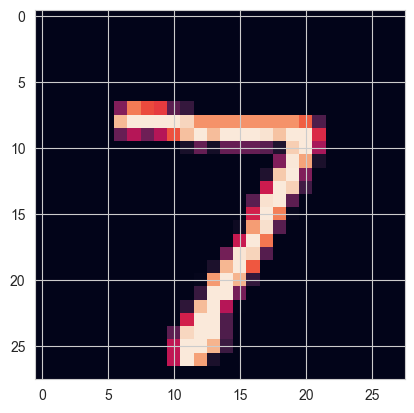

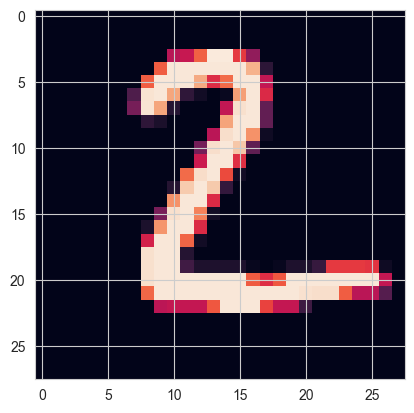

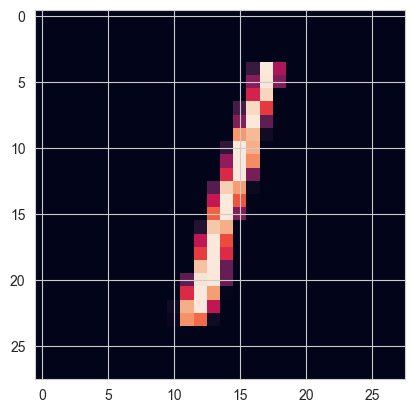

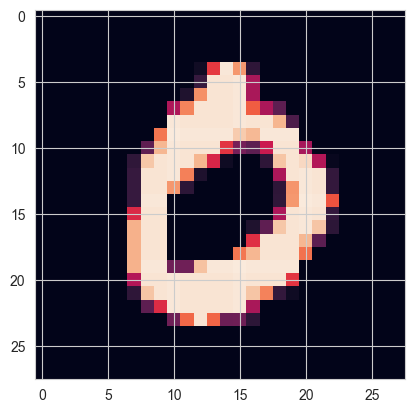

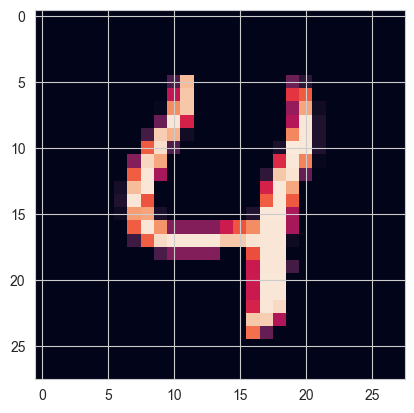

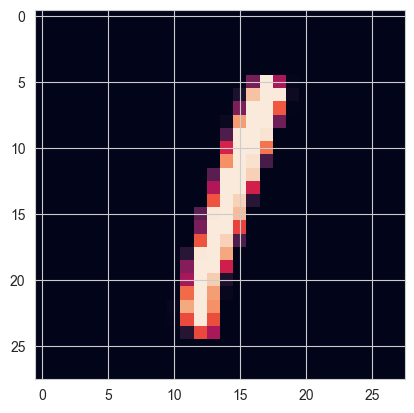

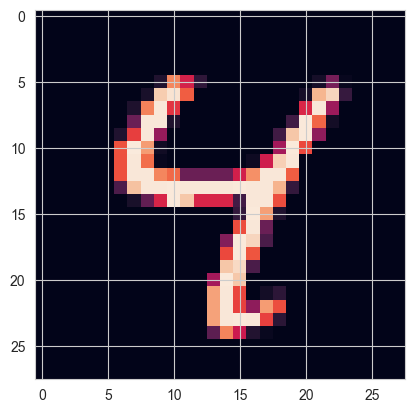

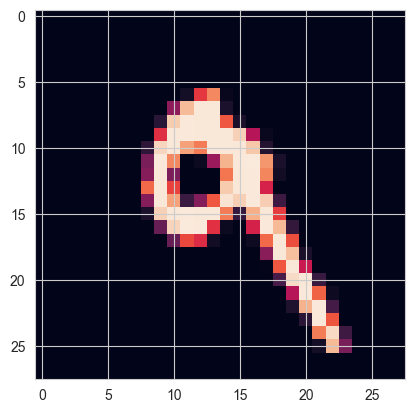

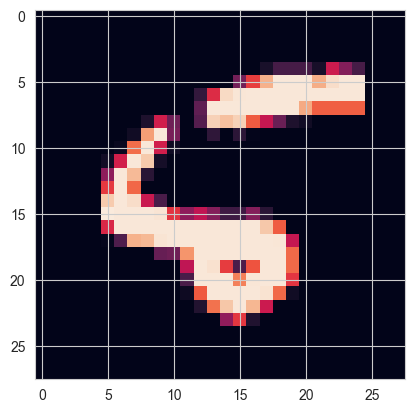

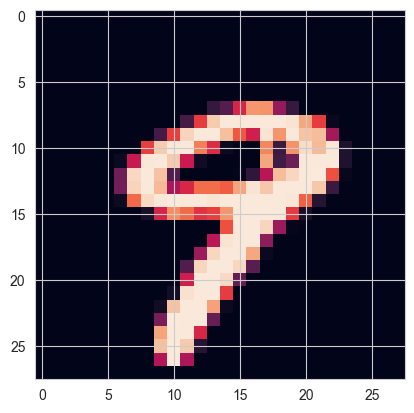

In [7]:
import matplotlib.pyplot as plt

for i in range(0,10):
    plt.imshow(x_test[i])
    plt.show()

컬러 테이블을 흑백으로 바꿔서 다시 표출해보겠습니다.

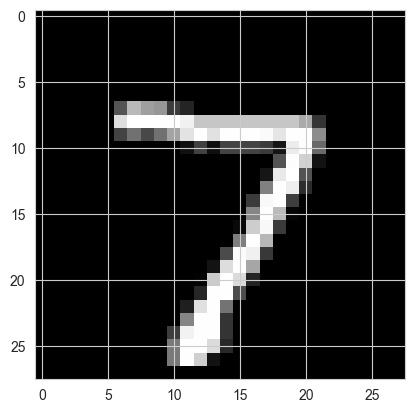

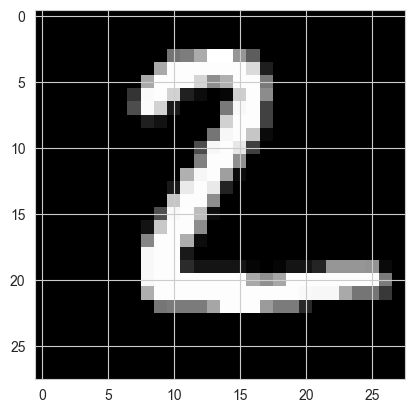

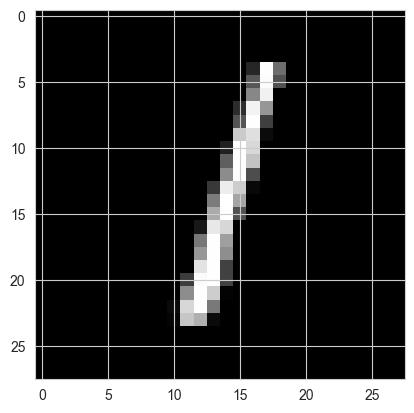

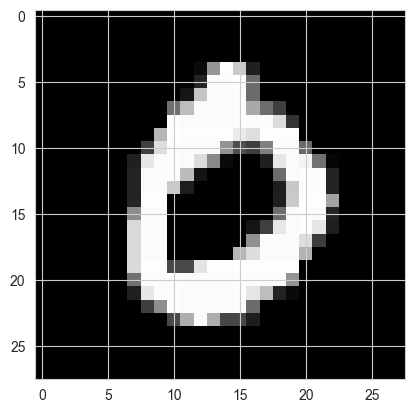

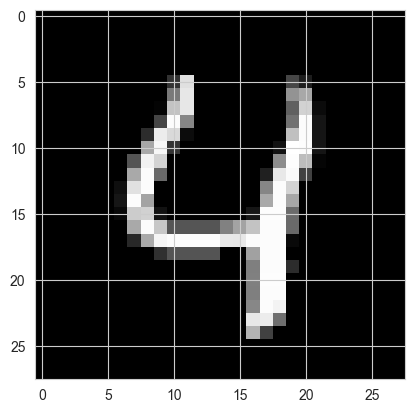

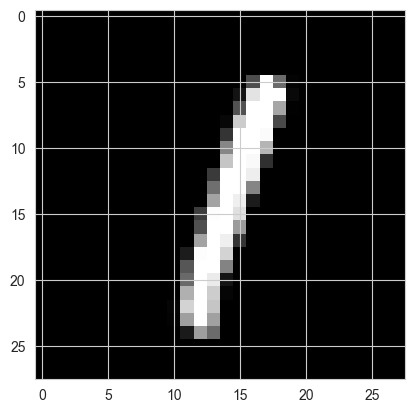

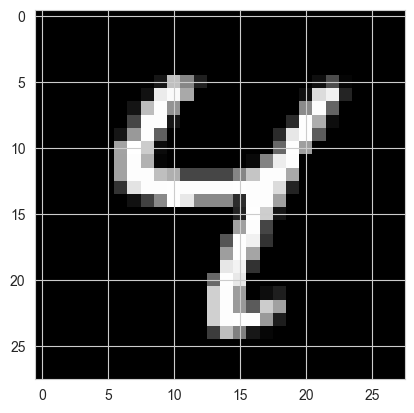

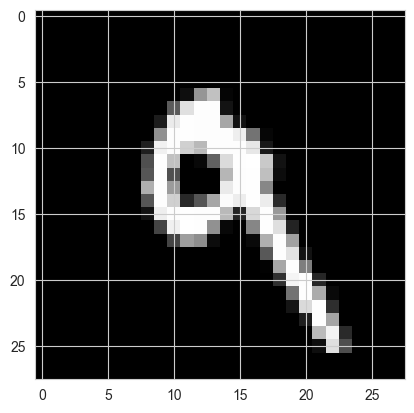

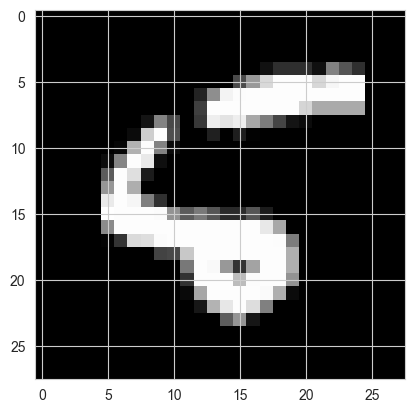

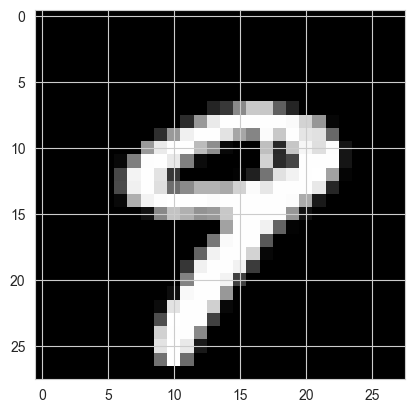

In [8]:
for i in range(0,10):
    plt.imshow(x_test[i], cmap='gray')
    plt.show()

샘플 데이터 이미지 10개를 보고 각 샘플에 대한 라벨을 기록합니다. 기록한 배열을 파일로 저장합니다.

In [9]:
import numpy as np

y_pred = [7, 2, 1, 0, 0, 0, 0, 0, 0, 0]

np.savetxt('y_pred.csv', y_pred, fmt='%d')